# 函数极值与规划模型

## 1.1 线性规划模型

线性规划问题：可行域最值

典型应用：
- 配送运输问题
    - 大车、小车
    - 货物重量
- 生产规划问题
    - 每种原料各买多少
    
- 几何切割问题
    - 体积最大
    - 长宽高多少
- 买卖利润
    - 不同方案利润

中学线性规划
$$
z_{min} = ax + by \\
\left\{
\begin{array}
    aa_1x+b_1y \leq c_1 \\
    a_2x+b_2y \leq c_2 \\
    a_3x+b_3y \leq c_3 \\
\end{array}
\right.
$$

变成复杂函数、多维、等式、加范围

### 1.1.1 概念之类

向量：加减、数乘、取范数、内积、外积

矩阵：数乘：$x^Ty$, 行列式，余子式、矩阵乘法、求逆 $A^{-1}=\frac{A^*}{|A|}$

代码实现矩阵运算

In [1]:
import numpy as np

In [2]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 6, 3], [6, 5, 2]])
c = np.array([[1], [2], [3]])
d = np.array([[1, 2], [3, 4]])

In [3]:
t1 = a + b
t2 = 3 * a
t3 = np.dot(a, c)
t4 = a * b
t5 = a.T
t6 = np.linalg.inv(d)
t7 = np.linalg.det(d)
t8 = np.linalg.matrix_rank(d)
print(t1)
print('*'*10)
print(t2)
print('*'*10)
print(t3)
print('*'*10)
print(t4)
print('*'*10)
print(t5)
print('*'*10)
print(t6)
print('*'*10)
print(t7)
print('*'*10)
print(t8)

[[ 8  8  6]
 [10 10  8]]
**********
[[ 3  6  9]
 [12 15 18]]
**********
[[14]
 [32]]
**********
[[ 7 12  9]
 [24 25 12]]
**********
[[1 4]
 [2 5]
 [3 6]]
**********
[[-2.   1. ]
 [ 1.5 -0.5]]
**********
-2.0000000000000004
**********
2


### 1.1.2 求一次方程组的解

$$
\left\{
\begin{array}
   110x-y-2z &= 72 \\
   -x+10y-2z &= 83 \\
    -x-y+5z &= 42 \\
\end{array}
\right.
$$

In [4]:
A = np.array([
    [10,-1,-2],
    [-1, 10, -2],
    [-1, -1, 5]
])   # 系数矩阵
b = np.array([72, 83, 42]) 

method1

In [5]:
inv_A = np.linalg.inv(A) # 逆矩阵
x = inv_A.dot(b)
x

array([11., 12., 13.])

method2

In [6]:
x = np.linalg.solve(A, b)
x

array([11., 12., 13.])

method3

In [7]:
from sympy import symbols, Eq, solve

x, y, z = symbols('x y z')
eqs = [
    Eq(10 * x - y - 2 * z, 72),
    Eq(-x + 10 * y - 2 * z, 83),
    Eq(-x - y + 5 * z, 42)
]
print(solve(eqs, [x, y, z]))

{x: 11, y: 12, z: 13}


### 1.1.3 线性规划的标准形式

$$
    \min_{\boldsymbol{x}} c^T\boldsymbol{x} \\
    st.
    \left\{
    \begin{array}
        A\boldsymbol{x} \leq b \\
        Aeq \cdot \boldsymbol{x} = beq \\
        lb \leq \boldsymbol{x} \leq ub
    \end{array}
    \right.
$$

规范式， 注意小于等于，求最小值

$$
   \max z = c^TX \\
   st.
    \left\{
    \begin{array}
        AA\tilde{X} = b \\
        \tilde{X} \geq 0
    \end{array}
    \right.
$$

其中 $\tilde{X}$ 是补的松弛变量，比如 $x_1+2x_2+x_3 \leq 10$, 可以补为 $x_1 + 2x_2 + x_3 + x_4=10$， 其中 $x_4 \geq 0$

求解线性规划, `python`实现

$$
    \max z = 2x_1+3x_2-5x_3 \\
    st.
    \left\{
    \begin{array}
        xx_1 + x_2+x_3=7 \\
        2x_1 - 5x_2+x_3 \geq 10 \\
        x_1 + 3x_2+x_3\leq12 \\
        x_1,x_2,x_3 \geq 0\\
    \end{array}
    \right.
$$

In [8]:
from scipy import optimize
import numpy as np

c = np.array([2, 3, -5]) # 目标函数系数

#-------不等式
A = np.array([
    [-2, 5, -1],         # 注意转为小于等于！！！！！！！
    [1, 3, 1]
])
b = np.array([-10, 12])  # 结果矩阵

#-------等式
Aeq = np.array([[1, 1, 1]])
beq = np.array([7])

#-------范围
x1 = (0, None)
x2 = (0, None)
x3 = (0, None)

res = optimize.linprog(-c, A, b, Aeq, beq, bounds=(x1, x2, x3)) # -c!!!(找最小值)
print(res)

           con: array([0.])
 crossover_nit: 0
         eqlin:  marginals: array([-2.28571429])
  residual: array([0.])
           fun: -14.571428571428571
       ineqlin:  marginals: array([-0.14285714, -0.        ])
  residual: array([0.        , 3.85714286])
         lower:  marginals: array([0.        , 0.        , 7.14285714])
  residual: array([6.42857143, 0.57142857, 0.        ])
       message: 'Optimization terminated successfully. (HiGHS Status 7: Optimal)'
           nit: 3
         slack: array([0.        , 3.85714286])
        status: 0
       success: True
         upper:  marginals: array([0., 0., 0.])
  residual: array([inf, inf, inf])
             x: array([6.42857143, 0.57142857, 0.        ])


In [9]:
print("最大值：", -res.fun)
print("参数取值：", res.x)

最大值： 14.571428571428571
参数取值： [6.42857143 0.57142857 0.        ]


### 1.1.4 单纯形法

固定变量，变换基向量带入求方程组的解

### 1.1.5 蒙特卡洛法

随机，频率->求解

## 1.2 非线性规划模型

$$
    \min f(\boldsymbol{x}) \\
    s.t.
    \left\{
    \begin{array}
        AA\boldsymbol{x} \leq B \\
        Aeq \cdot \boldsymbol{x} = Beq \\
        C(\boldsymbol{x}) \leq 0 \\
        Ceq(\boldsymbol{x}) = 0 \\
    \end{array}
    \right.
$$

二次规划：目标函数是2次的，大概长这样：

$$
    \min f = 2x_1^{2} + 3x_1x_3 - x_2^{2} \\
    s.t.
    \left\{
    \begin{array}
        xx_1^{2}-2x_2+3x_3=4 \\
        x_1 + x_2 - x_3 \leq 6 \\
        2x_1 - x_2 + x_3 \leq 15 \\
        x_1, x_2, x_3 > 0
    \end{array}
    \right.
$$

### 1.2.1 概念之类

多元函数、多元函数微分 $df = \frac{\partial f}{\partial x} dx + \frac{\partial f}{\partial y} dy$， 多元函数极值，

**拉格朗日乘子法**

$$
    \textrm{maximize} f(x, y)\quad s.t. \; g(x, y)=0 \\
    \mathcal L(x, y, \lambda) = f(x, y) - \lambda \cdot g(x, y)
$$

**KKT**

设目标函数 $f(x)$ ，不等式约束 $g(x)$ ，等式约束 $h(x)$ ，则问题可描述如下：
$$ 
    \min f(x) \\
    s.t.
    \left\{
    \begin{array}
        hh(x) = 0 \\
       g(x) \leq 0
    \end{array}
    \right.
$$
应用 KKT:
$$
    \\ \\L(x, \lambda, \mu) = f(x) + \lambda h(x) + \mu g(x) \\
    \left\{
    \begin{array}
        p\frac{\partial L}{\partial x} \lvert_{x=x^*} \quad = 0 \\
        \lambda \not= 0 \\
        \mu \geq 0 \\
        \mu g(x^*) = 0 \\
        h(x^*)= 0\\ 
        g(x^*) \leq 0
     \end{array}
    \right.\\
$$
其中 $\mu g(x)$ 就叫 KKT乘子，约束条件中 $\mu g(x^*) = 0$ 是保证在 $x^*$ 这一点 $L(x, \lambda, \mu)是 0$

### 1.2.2 例子1

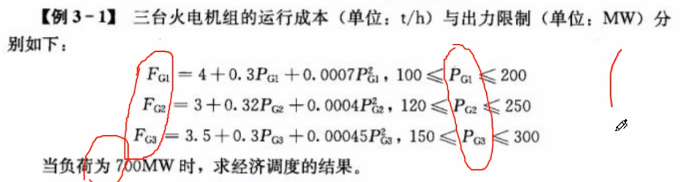

模型：
$$
   \begin{array}
   qF = F_{G_1} + F_{G_2} + F_{G_3}, \quad \min F \\
    100 \leq P_{G_1} \leq 200 \\
    120 \leq P_{G_2} \leq 250 \\
    150 \leq P_{G_3} \leq 300 \\
    P_1 + P_2 + P_3 = 700
   \end{array}
$$

1. `scipy` 实现

In [26]:
from scipy.optimize import minimize
import numpy as np

# 目标函数 , x : list[3]
def fun(x):
    return 4 + 0.3 * x[0] + 0.0007 * x[0] ** 2 \
        +  3 + 0.32 * x[1] + 0.0004 * x[1] ** 2 \
        +  3.5 + 0.3 * x[2] + 0.00045 * x[2] ** 2

# 约束条件
def con():
    """
        返回约束条件，形式是一个 tuple 内部有几个字典
        
        (
            {'type': 'type1', 'fun': function}, \
            {'type': 'type1', 'fun': function}, \
            ...
        )
        
    """
    # 约束条件分为 eq 和 ineq
    cons = ({
        'type': 'eq',
        'fun': lambda x : x[0] + x[1] + x[2] - 700
    })
    
#    不等式约束样例：
#     cons = ({
#         'type': 'ineq',
#         'fun': lambda x : -x[2] + x2max  # 这里默认是大于等于0，-x[2] + x2max 表示x[2] <= x2max(给定)
#     })

    return cons

b1 = (100, 200)
b2 = (120, 250)
b3 = (150, 300)

bnds = (b1, b2, b3)

cons = con() # 约束

# 设置初始值
x0 = np.array((150, 250, 20))

# 方法一
# res = minimize(fun, x0, method='SLSQP', constraints=cons, bounds=bnds)
"""
cost:  305.96739130439465
True
solution:  [176.08675477 250.         273.91324523]
"""

# 方法二
res = minimize(fun, x0, method='L-BFGS-B', constraints=cons, bounds=bnds)
"""
cost:  146.78500000000003
True
solution:  [100. 120. 150.]
"""

# 然而似乎这两个都不太对。。。。。。。。。。。。。。。。

print("cost: ", res.fun)
print(res.success)
print("solution: ", res.x)

cost:  146.78500000000003
True
solution:  [100. 120. 150.]


2. 遗传算法求解

In [15]:
from sko.GA import GA

def object_func(x):
    return 4 + 0.3 * x[0] + 0.0007 * x[0] ** 2 \
        +  3 + 0.32 * x[1] + 0.0004 * x[1] ** 2 \
        +  3.5 + 0.3 * x[2] + 0.00045 * x[2] ** 2

# 等式约束
def cons1(x):
    return [x[0] + x[1] + x[2] - 700]


# 不等式约束
# constraint_ueq = [
#     #不等式约束条件：
#     lambda x: 1 - x[0] * x[1],
#     lambda x: x[0] * x[1] - 5
#     #无需使用不等式表示，直接使用表达式即可，但该表达式需要小于等于0，列如第一个约束条件5>=x1*x2,则改写成x1*x2-5：
# ]
 

cons = cons1
ga = GA(func=object_func, \
    n_dim=3, \
    size_pop=200,\
    max_iter=1000, \
    lb=[100, 120, 150], \
    ub=[200, 250, 300], \
    constraint_eq=[cons])

best_x,best_y = ga.run()
print("best_x: ", best_x)
print("best_y: ", best_y)

"""
其中func为自定义的求值函数，
n_dim为求值函数的自变量维度，
size_pop为每一次迭代时的染色体数目，
max_iter为迭代的次数，
prop_mut为变异因子，
lb为求值函数自变量的最小值，
ub为求值函数自变量的最大值，
constraint_eq为求值函数自变量等式约束，
penalty_ueq为求值函数自变量的不等式约束，
precision为求值函数自变量的精度。

"""


ModuleNotFoundError: No module named 'sko'

`sko` 安装有点问题，命令行运行正常

max_iter: 800
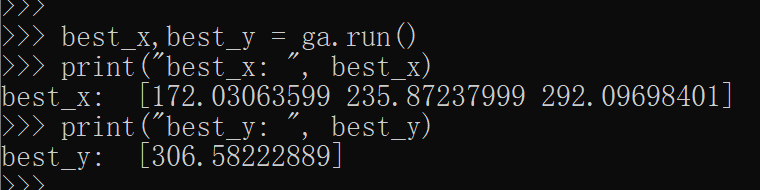
max_iter: 1000=
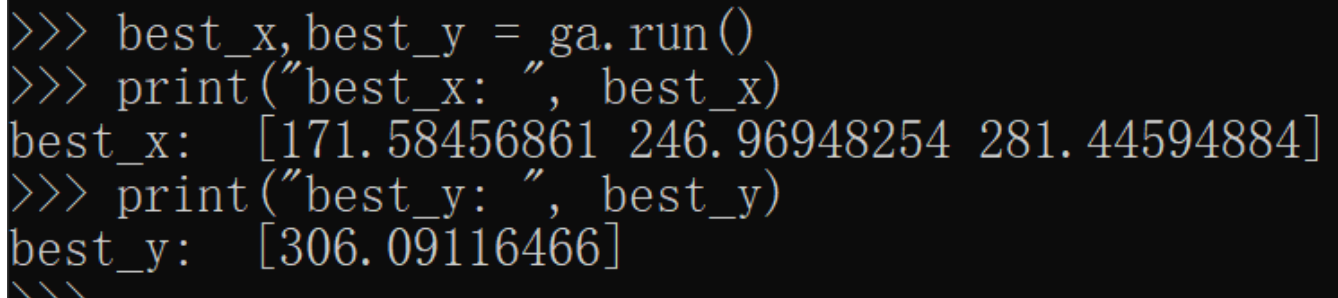

### 1.2.3 例子2(找了几个靠谱点的)

1. 无约束求极值：计算 $\frac{1}{x} + x$ 最小值

In [27]:

from scipy.optimize import minimize
import numpy as np
 
def fun(args):
     a=args
     v=lambda x:a/x[0] +x[0]
     return v
 
args = (1)  #a
x0 = np.asarray((2))  # 初始猜测值
res = minimize(fun(args), x0, method='SLSQP')
print(res.fun)
print(res.success)

2.0000000815356342
True


2. 有约束求极值 ： 计算 $\frac{2 + x_1}{1 + x_2} - 3x_1 + 4x_3,\quad x_1, x_2, x_3\in[0.1, 0.9]$ 最小值

In [28]:
def fun(args):
    a,b,c,d = args
    v = lambda x: (a+x[0])/(b+x[1]) -c*x[0]+d*x[2]
    return v
    
def con(args):
    # 约束条件 分为eq 和ineq
    # eq表示 函数结果等于0 ； ineq 表示 表达式大于等于0  
    x1min, x1max, x2min, x2max, x3min, x3max = args
    cons = ({'type': 'ineq', 'fun': lambda x: x[0] - x1min},\
            {'type': 'ineq', 'fun': lambda x: -x[0] + x1max},\
            {'type': 'ineq', 'fun': lambda x: x[1] - x2min},\
            {'type': 'ineq', 'fun': lambda x: -x[1] + x2max},\
            {'type': 'ineq', 'fun': lambda x: x[2] - x3min},\
            {'type': 'ineq', 'fun': lambda x: -x[2] + x3max})
    return cons
 
# 定义常量值
args = (2,1,3,4)  # a,b,c,d

# 设置参数范围/约束条件
args1 = (0.1,0.9,0.1, 0.9,0.1,0.9)  # x1min, x1max, x2min, x2max
cons = con(args1)

# 设置初始猜测值  
x0 = np.asarray((0.5,0.5,0.5))

res = minimize(fun(args), x0, method='SLSQP',constraints=cons)
print(res.fun)
print(res.success)
print(res.x)

-0.773684210526435
True
[0.9 0.9 0.1]


3. 解决
$$
    minimize_{x[0], x[1]}log_2(1+\frac{x[0]\times2}{3}+log_2\frac{x[1]\times3}{4})\\
    s.t.\\
    log_2(1+\frac{x[0]\times2}{5})\geq 5 \\
    log_2(1+\frac{x[0]\times6}{4})\geq 5
$$

In [29]:
# 目标函数
def fun(a,b,c,d):
    def v(x):
        return np.log2(1+x[0]*a/b)+np.log2(1+x[1]*c/d)
    return v
    
#限制条件函数
def con(a,b,i):
    def v(x):
        return np.log2(1 + x[i] * a / b)-5
    return v

# 定义常量值
args = [2, 1, 3, 4]  # a,b,c,d
args1 = [2, 5, 6, 4] 

# 设置初始猜测值
x0 = np.asarray((0.5, 0.5))

#设置限制条件
cons = ({'type': 'ineq', 'fun': con(args1[0],args1[1],0)},
        {'type': 'ineq', 'fun': con(args1[2],args1[3],1)},
        )

res = minimize(fun(args[0], args[1], args[2], args[3]), x0, constraints=cons)
print(res.fun)
print(res.success)
print(res.x)

11.329796332293162
True
[77.5        20.66666658]
